In [1]:
import gc

import numpy as np
import pandas as pd

import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
# sns.set(font='IPAexGothic')

from IPython.display import display, Image
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

In [2]:
!pwd

/Users/kenta_kasugai/competition/nishika_akutagawa/notebook


In [3]:
negaposi_sentence_split10 = pd.read_csv("../input/feature_negaposi_sentence_split10.csv", index_col=0)
negaposi_describe = pd.read_csv("../input/feature_negaposi_describe.csv", index_col=0)
word_count100_tfidf = pd.read_csv("../input/feature_word_count100_tfidf.csv", index_col=0)
word_count100_tfidf_pca1000 = pd.read_csv("../input/feature_word_count100_tfidf_pca1000.csv", index_col=0)
katsuyo0_freq = pd.read_csv("../input/feature_katsuyo0_freq.csv", index_col=0)
katsuyo01_freq = pd.read_csv("../input/feature_katsuyo01_freq.csv", index_col=0)
adjective012_freq = pd.read_csv("../input/feature_adjective012_freq.csv", index_col=0)
adjective01_freq = pd.read_csv("../input/feature_adjective01_freq.csv", index_col=0)
adjective0_freq = pd.read_csv("../input/feature_adjective0_freq.csv", index_col=0)
hyoki = pd.read_csv("../input/feature_hyoki.csv", index_col=0)

In [4]:
print(negaposi_sentence_split10.shape)
print(negaposi_describe.shape)
print(word_count100_tfidf.shape)
print(word_count100_tfidf_pca1000.shape)
print(katsuyo0_freq.shape)
print(katsuyo01_freq.shape)
print(adjective012_freq.shape)
print(adjective01_freq.shape)
print(adjective0_freq.shape)
print(hyoki.shape)

(4396, 10)
(4732, 5)
(4732, 9502)
(4732, 1000)
(4732, 58)
(4732, 348)
(4732, 67)
(4732, 67)
(4732, 14)
(4732, 14)


In [5]:
data = pd.concat([negaposi_sentence_split10,
                  negaposi_describe,
                  word_count100_tfidf,
                  word_count100_tfidf_pca1000,
                  katsuyo0_freq,
                  katsuyo01_freq,
                  adjective012_freq,
                  adjective01_freq,
                  adjective0_freq,
                  hyoki,
                  ], axis=1)

In [6]:
data

,negaposi_split_0,negaposi_split_1,negaposi_split_2,negaposi_split_3,negaposi_split_4,negaposi_split_5,negaposi_split_6,negaposi_split_7,negaposi_split_8,negaposi_split_9,count,mean,std,min,max,ああ_tfidf,あい_tfidf,あいかわらず_tfidf,あいさつ_tfidf,あいだ_tfidf,あいつ_tfidf,あいにく_tfidf,あいまい_tfidf,あう_tfidf,あか_tfidf,あかい_tfidf,あかり_tfidf,あがる_tfidf,あき_tfidf,あきらか_tfidf,あきらめ_tfidf,あきらめる_tfidf,あきる_tfidf,あきれる_tfidf,あく_tfidf,あくどい_tfidf,あくび_tfidf,あくまで_tfidf,あくまでも_tfidf,あぐら_tfidf,あける_tfidf,あげく_tfidf,あげる_tfidf,あこがれ_tfidf,あこがれる_tfidf,あご_tfidf,あさい_tfidf,あさましい_tfidf,あざ_tfidf,あざやか_tfidf,あし_tfidf,あした_tfidf,あす_tfidf,あすこ_tfidf,あずかる_tfidf,あずける_tfidf,あせる_tfidf,あそこ_tfidf,あそぶ_tfidf,あたかも_tfidf,あたし_tfidf,あたたかい_tfidf,あたら_tfidf,あたり_tfidf,あたりまえ_tfidf,あたり前_tfidf,あたる_tfidf,あだな_tfidf,あちこち_tfidf,あちら_tfidf,あっ_tfidf,あっけ_tfidf,あっさり_tfidf,あっし_tfidf,あっち_tfidf,あつい_tfidf,あつかう_tfidf,あつまる_tfidf,あつめる_tfidf,あて_tfidf,あてる_tfidf,あと_tfidf,あな_tfidf,あながち_tfidf,あなた_tfidf,あに_tfidf,あにい_tfidf,あの_tfidf,あはれ_tfidf,あばれる_tfidf,あびる_tfidf,あふる_tfidf,あふれる_tfidf,あぶない_tfidf,あぶる_tfidf,あべこべ_tfidf,あま_tfidf,あまり_tfidf,あまりに_tfidf,あまる_tfidf,...,記号括弧閉*,記号括弧開*,記号空白*,記号読点*,連体詞**,BOS/EOS**,その他間投*,フィラー**,副詞一般*,副詞助詞類接続*,助動詞**,助詞並立助詞*,助詞係助詞*,助詞副助詞*,助詞副助詞／並立助詞／終助詞*,助詞副詞化*,助詞接続助詞*,助詞格助詞一般,助詞格助詞引用,助詞格助詞連語,助詞特殊*,助詞終助詞*,助詞連体化*,動詞接尾*,動詞自立*,動詞非自立*,名詞サ変接続*,名詞ナイ形容詞語幹*,名詞一般*,名詞代名詞一般,名詞代名詞縮約,名詞副詞可能*,名詞動詞非自立的*,名詞固有名詞一般,名詞固有名詞人名,名詞固有名詞地域,名詞固有名詞組織,名詞引用文字列*,名詞形容動詞語幹*,名詞接尾サ変接続,名詞接尾一般,名詞接尾人名,名詞接尾副詞可能,名詞接尾助動詞語幹,名詞接尾助数詞,名詞接尾地域,名詞接尾形容動詞語幹,名詞接尾特殊,名詞接続詞的*,名詞数*,名詞特殊助動詞語幹,名詞非自立一般,名詞非自立副詞可能,名詞非自立助動詞語幹,名詞非自立形容動詞語幹,形容詞接尾*,形容詞自立*,形容詞非自立*,感動詞**,接続詞**,接頭詞動詞接続*,接頭詞名詞接続*,接頭詞形容詞接続*,接頭詞数接続*,記号アルファベット*,記号一般*,記号句点*,記号括弧閉*,記号括弧開*,記号空白*,記号読点*,連体詞**,BOS/EOS,その他,フィラー,副詞,助動詞,助詞,動詞,名詞,形容詞,感動詞,接続詞,接頭詞,記号,連体詞,letter_number,kanji,hiragana,katakana,digit,alphabet,old_kanji,old_hiragana,old,lowercase,hagyo,kakko,kagikakko,kutoten
0,-0.189030,-0.130570,-0.175781,-0.159920,-0.241814,-0.230414,-0.068126,-0.187654,-0.146884,-0.111569,14.0,-0.152729,0.053904,-0.241814,-0.068126,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033818,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.009346,0.009346,0.014019,0.056075,0.014019,0.004673,0.000000,0.009346,0.009346,0.007009,0.102804,0.002336,0.051402,0.007009,0.000000,0.002336,0.030374,0.116822,0.007009,0.004673,0.000000,0.000000,0.051402,0.004673,0.098131,0.018692,0.035047,0.002336,0.130841,0.028037,0.000000,0.004673,0.000000,0.000000,0.011682,0.000000,0.000000,0.0,0.016355,0.000000,0.009346,0.000000,0.000000,0.000000,0.000000,0.000000,0.002336,0.002336,0.000000,0.000000,0.000000,0.035047,0.002336,0.002336,0.000000,0.002336,0.014019,0.002336,0.000000,0.007009,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.032710,0.009346,0.009346,0.014019,0.056075,0.014019,0.004673,0.000000,0.009346,0.016355,0.102804,0.273364,0.121495,0.282710,0.018692,0.000000,0.007009,0.000000,0.149533,0.014019,651.0,0.298003,0.594470,0.036866,0.000000,0.000000,0.001536,0.000000,0.001536,0.007680,0.016897,0.000000,0.012289,0.058372
1,-0.112867,-0.149643,-0.163352,-0.187332,-0.184833,-0.069419,-0.144469,-0.173366,-0.115937,-0.085715,20.0,-0.138693,0.054466,-0.250899,-0.037045,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0000

In [7]:
del negaposi_sentence_split10
del negaposi_describe
del word_count100_tfidf
del word_count100_tfidf_pca1000
del katsuyo0_freq
del katsuyo01_freq
del adjective012_freq
del adjective01_freq
del adjective0_freq
del hyoki

gc.collect()

14

negaposi_sentence_split10
negaposi_describe
word_count100_tfidf
word_count100_tfidf_pca1000
katsuyo0_freq
katsuyo01_freq
adjective012_freq
adjective01_freq
adjective0_freq
hyoki

In [8]:
y = pd.read_csv("../input/target.csv", index_col=0, names=["target"])

In [9]:
y.head()

,target
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [10]:
train_index = y[y["target"].notna()].index
test_index = y[y["target"].isna()].index

In [11]:
X_train_valid = data.iloc[train_index]
X_test = data.iloc[test_index]
y_train_valid = y.iloc[train_index]
y_train_valid = y_train_valid.astype(int)

In [12]:
del data, y
gc.collect()

0

# 学習・予測

In [13]:
# !pip install optuna
# !pip install plotly

In [14]:
import lightgbm as lgb
import optuna
from optuna.visualization import plot_optimization_history
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### ハイパラ調整

### hold out

In [15]:
col_name = X_train_valid.columns.values
X_train_valid.columns = range(X_train_valid.shape[1])
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3, random_state=0, stratify=y_train_valid)

In [16]:
train = lgb.Dataset(X_train, label=y_train)
valid = lgb.Dataset(X_valid, label=y_valid)

In [17]:
# https://stackoverflow.com/questions/50931168/f1-score-metric-in-lightgbm
def lgbf1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

In [58]:
def objectives(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'leaning_rate' : 0.1,
        'random_state': 0,
        'max_depth' : trial.suggest_int('max_depth', 1, 10),
        "min_chlid_wight" : trial.suggest_int('min_chlid_wight', 1, 10),
        'gamma' : trial.suggest_uniform('gamma', 0, 0.4),
        'colsample_bytree' : trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'subsamples' : trial.suggest_uniform('subsamples', 0.5, 1.0),
        'lambda_l1' : trial.suggest_uniform('lambda_l1' , 0.0, 1.0),
        'lambda_l2' : trial.suggest_uniform('lambda_l2' , 0.0, 1.0),
        'subsample_freq' : trial.suggest_int('subsample_freq', 0, 1),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction' : trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction' : trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    evals_result = {}

    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "binary_logloss")

    model = lgb.train(
        params=params,
        train_set=train,
        valid_sets=valid,
#         feval=lgbf1_score,
        num_boost_round=10000,
        early_stopping_rounds=50,
        verbose_eval=20,
#         evals_result=evals_result,
        callbacks=[pruning_callback]
        )

    # 訓練、テスト誤差
#     y_pred_train =  (model.predict(X_train) > 0.1)*1
#     y_pred_valid =  (model.predict(X_valid) > 0.1)*1
#     score_train = 1.0 - accuracy_score(y_train, y_pred_train)
#     score_valid = 1.0 - accuracy_score(y_valid, y_pred_valid)

    y_pred_train =  model.predict(X_train)
    y_pred_valid =  model.predict(X_valid)
    score_train = log_loss(y_train, y_pred_train)
    score_valid = log_loss(y_valid, y_pred_valid)

    # エラー率の記録
    trial.set_user_attr("score_train", score_train)
    trial.set_user_attr("score_valid", score_valid)

    return score_valid

In [59]:
%%time
study = optuna.create_study()
# study.optimize(objectives, timeout=60)
study.optimize(objectives, n_trials=100)#, n_jobs=-1)

Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0686222
[40]	valid_0's binary_logloss: 0.0393164
[60]	valid_0's binary_logloss: 0.0313879
[80]	valid_0's binary_logloss: 0.0310911
[100]	valid_0's binary_logloss: 0.0307062
Early stopping, best iteration is:
[69]	valid_0's binary_logloss: 0.0305108


[I 2020-01-27 04:29:20,025] Finished trial#0 resulted in value: 0.030510753085542613. Current best value is 0.030510753085542613 with parameters: {'max_depth': 5, 'min_chlid_wight': 2, 'gamma': 0.02045547572468083, 'colsample_bytree': 0.5855986586177242, 'subsamples': 0.7359974325907411, 'lambda_l1': 0.2711791142530624, 'lambda_l2': 0.6188600865063194, 'subsample_freq': 0, 'num_leaves': 181, 'feature_fraction': 0.7652966871185997, 'bagging_fraction': 0.4328741046930813, 'bagging_freq': 6, 'min_child_samples': 30}.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.116306
[40]	valid_0's binary_logloss: 0.0757368
[60]	valid_0's binary_logloss: 0.0565547
[80]	valid_0's binary_logloss: 0.0474564
[100]	valid_0's binary_logloss: 0.0403953
[120]	valid_0's binary_logloss: 0.0367024
[140]	valid_0's binary_logloss: 0.0329458
[160]	valid_0's binary_logloss: 0.0310279
[180]	valid_0's binary_logloss: 0.0290684
[200]	valid_0's binary_logloss: 0.027385
[220]	valid_0's binary_logloss: 0.0268584
[240]	valid_0's binary_logloss: 0.0268576
[260]	valid_0's binary_logloss: 0.0263139
[280]	valid_0's binary_logloss: 0.0258381
[300]	valid_0's binary_logloss: 0.0254809
[320]	valid_0's binary_logloss: 0.024895
[340]	valid_0's binary_logloss: 0.0247072
[360]	valid_0's binary_logloss: 0.0244544
[380]	valid_0's binary_logloss: 0.0245443
[400]	valid_0's binary_logloss: 0.0245165
Early stopping, best iteration is:
[354]	valid_0's binary_logloss: 0.0243242


[I 2020-01-27 04:29:32,102] Finished trial#1 resulted in value: 0.024324238700243393. Current best value is 0.024324238700243393 with parameters: {'max_depth': 1, 'min_chlid_wight': 1, 'gamma': 0.20105602212893914, 'colsample_bytree': 0.9091128845963836, 'subsamples': 0.5304478395710571, 'lambda_l1': 0.5749513667177112, 'lambda_l2': 0.5012712129330382, 'subsample_freq': 1, 'num_leaves': 6, 'feature_fraction': 0.5440406971712253, 'bagging_fraction': 0.7717650960155947, 'bagging_freq': 1, 'min_child_samples': 60}.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0638255
[40]	valid_0's binary_logloss: 0.0391282
[60]	valid_0's binary_logloss: 0.0339554
[80]	valid_0's binary_logloss: 0.0324309
[100]	valid_0's binary_logloss: 0.0318892
[120]	valid_0's binary_logloss: 0.0315283
[140]	valid_0's binary_logloss: 0.0310949
[160]	valid_0's binary_logloss: 0.0310498
[180]	valid_0's binary_logloss: 0.0308002
[200]	valid_0's binary_logloss: 0.030789
[220]	valid_0's binary_logloss: 0.030747
[240]	valid_0's binary_logloss: 0.0307413
[260]	valid_0's binary_logloss: 0.0307711
Early stopping, best iteration is:
[216]	valid_0's binary_logloss: 0.0306693


[I 2020-01-27 04:29:53,595] Finished trial#2 resulted in value: 0.03066932674859979. Current best value is 0.024324238700243393 with parameters: {'max_depth': 1, 'min_chlid_wight': 1, 'gamma': 0.20105602212893914, 'colsample_bytree': 0.9091128845963836, 'subsamples': 0.5304478395710571, 'lambda_l1': 0.5749513667177112, 'lambda_l2': 0.5012712129330382, 'subsample_freq': 1, 'num_leaves': 6, 'feature_fraction': 0.5440406971712253, 'bagging_fraction': 0.7717650960155947, 'bagging_freq': 1, 'min_child_samples': 60}.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.117971
[40]	valid_0's binary_logloss: 0.0753813
[60]	valid_0's binary_logloss: 0.0553965
[80]	valid_0's binary_logloss: 0.0441832
[100]	valid_0's binary_logloss: 0.0391485
[120]	valid_0's binary_logloss: 0.0355668
[140]	valid_0's binary_logloss: 0.0326933
[160]	valid_0's binary_logloss: 0.0303772
[180]	valid_0's binary_logloss: 0.0281937
[200]	valid_0's binary_logloss: 0.0276385
[220]	valid_0's binary_logloss: 0.0261425
[240]	valid_0's binary_logloss: 0.0256814
[260]	valid_0's binary_logloss: 0.0249884
[280]	valid_0's binary_logloss: 0.02462
[300]	valid_0's binary_logloss: 0.0242983
[320]	valid_0's binary_logloss: 0.02376
[340]	valid_0's binary_logloss: 0.0238688
[360]	valid_0's binary_logloss: 0.0236638
[380]	valid_0's binary_logloss: 0.0237412
[400]	valid_0's binary_logloss: 0.0236147
Early stopping, best iteration is:
[366]	valid_0's binary_logloss: 0.0234783


[I 2020-01-27 04:30:06,464] Finished trial#3 resulted in value: 0.023478302060588794. Current best value is 0.023478302060588794 with parameters: {'max_depth': 1, 'min_chlid_wight': 1, 'gamma': 0.02044334738723874, 'colsample_bytree': 0.6315014984073021, 'subsamples': 0.8057518725023954, 'lambda_l1': 0.650213012888837, 'lambda_l2': 0.27966225108148246, 'subsample_freq': 0, 'num_leaves': 74, 'feature_fraction': 0.8981912784714728, 'bagging_fraction': 0.8022848870392113, 'bagging_freq': 3, 'min_child_samples': 78}.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0798504
[40]	valid_0's binary_logloss: 0.0485094
[60]	valid_0's binary_logloss: 0.0385252
[80]	valid_0's binary_logloss: 0.0355368
[100]	valid_0's binary_logloss: 0.0354111
[120]	valid_0's binary_logloss: 0.0374202
Early stopping, best iteration is:
[81]	valid_0's binary_logloss: 0.0351557


[I 2020-01-27 04:30:15,157] Finished trial#4 resulted in value: 0.035155696010420144. Current best value is 0.023478302060588794 with parameters: {'max_depth': 1, 'min_chlid_wight': 1, 'gamma': 0.02044334738723874, 'colsample_bytree': 0.6315014984073021, 'subsamples': 0.8057518725023954, 'lambda_l1': 0.650213012888837, 'lambda_l2': 0.27966225108148246, 'subsample_freq': 0, 'num_leaves': 74, 'feature_fraction': 0.8981912784714728, 'bagging_fraction': 0.8022848870392113, 'bagging_freq': 3, 'min_child_samples': 78}.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:15,351] Setting status of trial#5 as TrialState.PRUNED. Trial was pruned at iteration 2.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:15,725] Setting status of trial#6 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:15,988] Setting status of trial#7 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:16,265] Setting status of trial#8 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0665974
[40]	valid_0's binary_logloss: 0.0354656
[60]	valid_0's binary_logloss: 0.0270639
[80]	valid_0's binary_logloss: 0.0244862
[100]	valid_0's binary_logloss: 0.0241591
[120]	valid_0's binary_logloss: 0.0234812
[140]	valid_0's binary_logloss: 0.0232371
[160]	valid_0's binary_logloss: 0.0229369
[180]	valid_0's binary_logloss: 0.0228845
[200]	valid_0's binary_logloss: 0.0228845
Early stopping, best iteration is:
[165]	valid_0's binary_logloss: 0.0226816


[I 2020-01-27 04:30:30,694] Finished trial#9 resulted in value: 0.022733155649283257. Current best value is 0.022733155649283257 with parameters: {'max_depth': 7, 'min_chlid_wight': 1, 'gamma': 0.30215361641817684, 'colsample_bytree': 0.94103096398244, 'subsamples': 0.6912163638028502, 'lambda_l1': 0.5090249424955883, 'lambda_l2': 0.4934661806833621, 'subsample_freq': 1, 'num_leaves': 106, 'feature_fraction': 0.5544453133574767, 'bagging_fraction': 0.7496425191374796, 'bagging_freq': 2, 'min_child_samples': 70}.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0643446
[40]	valid_0's binary_logloss: 0.0355143
[60]	valid_0's binary_logloss: 0.0297446
[80]	valid_0's binary_logloss: 0.0281001
[100]	valid_0's binary_logloss: 0.0279031
[120]	valid_0's binary_logloss: 0.0274229
[140]	valid_0's binary_logloss: 0.0274229
Early stopping, best iteration is:
[104]	valid_0's binary_logloss: 0.0274229


[I 2020-01-27 04:30:43,136] Finished trial#10 resulted in value: 0.027422946848214277. Current best value is 0.022733155649283257 with parameters: {'max_depth': 7, 'min_chlid_wight': 1, 'gamma': 0.30215361641817684, 'colsample_bytree': 0.94103096398244, 'subsamples': 0.6912163638028502, 'lambda_l1': 0.5090249424955883, 'lambda_l2': 0.4934661806833621, 'subsample_freq': 1, 'num_leaves': 106, 'feature_fraction': 0.5544453133574767, 'bagging_fraction': 0.7496425191374796, 'bagging_freq': 2, 'min_child_samples': 70}.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:43,814] Setting status of trial#11 as TrialState.PRUNED. Trial was pruned at iteration 9.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:44,562] Setting status of trial#12 as TrialState.PRUNED. Trial was pruned at iteration 11.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0680951


[I 2020-01-27 04:30:45,869] Setting status of trial#13 as TrialState.PRUNED. Trial was pruned at iteration 22.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:46,358] Setting status of trial#14 as TrialState.PRUNED. Trial was pruned at iteration 3.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:46,783] Setting status of trial#15 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:47,234] Setting status of trial#16 as TrialState.PRUNED. Trial was pruned at iteration 6.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:47,678] Setting status of trial#17 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:48,505] Setting status of trial#18 as TrialState.PRUNED. Trial was pruned at iteration 14.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:48,953] Setting status of trial#19 as TrialState.PRUNED. Trial was pruned at iteration 3.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:49,312] Setting status of trial#20 as TrialState.PRUNED. Trial was pruned at iteration 2.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:49,554] Setting status of trial#21 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:49,792] Setting status of trial#22 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:50,071] Setting status of trial#23 as TrialState.PRUNED. Trial was pruned at iteration 2.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:50,316] Setting status of trial#24 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:50,724] Setting status of trial#25 as TrialState.PRUNED. Trial was pruned at iteration 8.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0672759


[I 2020-01-27 04:30:51,616] Setting status of trial#26 as TrialState.PRUNED. Trial was pruned at iteration 23.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:52,010] Setting status of trial#27 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:30:52,323] Setting status of trial#28 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0627184
[40]	valid_0's binary_logloss: 0.0347173
[60]	valid_0's binary_logloss: 0.0269178
[80]	valid_0's binary_logloss: 0.0249254
[100]	valid_0's binary_logloss: 0.0244386
[120]	valid_0's binary_logloss: 0.0238883
[140]	valid_0's binary_logloss: 0.024114
[160]	valid_0's binary_logloss: 0.0239478
[180]	valid_0's binary_logloss: 0.024022
Early stopping, best iteration is:
[133]	valid_0's binary_logloss: 0.0237774


[I 2020-01-27 04:31:04,609] Finished trial#29 resulted in value: 0.02377742724019547. Current best value is 0.022733155649283257 with parameters: {'max_depth': 7, 'min_chlid_wight': 1, 'gamma': 0.30215361641817684, 'colsample_bytree': 0.94103096398244, 'subsamples': 0.6912163638028502, 'lambda_l1': 0.5090249424955883, 'lambda_l2': 0.4934661806833621, 'subsample_freq': 1, 'num_leaves': 106, 'feature_fraction': 0.5544453133574767, 'bagging_fraction': 0.7496425191374796, 'bagging_freq': 2, 'min_child_samples': 70}.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:31:04,951] Setting status of trial#30 as TrialState.PRUNED. Trial was pruned at iteration 2.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0607945
[40]	valid_0's binary_logloss: 0.0327325
[60]	valid_0's binary_logloss: 0.0253775
[80]	valid_0's binary_logloss: 0.0245127
[100]	valid_0's binary_logloss: 0.0235739
[120]	valid_0's binary_logloss: 0.0237078
[140]	valid_0's binary_logloss: 0.0237897
Early stopping, best iteration is:
[105]	valid_0's binary_logloss: 0.0232843


[I 2020-01-27 04:31:17,070] Finished trial#31 resulted in value: 0.02328432853228212. Current best value is 0.022733155649283257 with parameters: {'max_depth': 7, 'min_chlid_wight': 1, 'gamma': 0.30215361641817684, 'colsample_bytree': 0.94103096398244, 'subsamples': 0.6912163638028502, 'lambda_l1': 0.5090249424955883, 'lambda_l2': 0.4934661806833621, 'subsample_freq': 1, 'num_leaves': 106, 'feature_fraction': 0.5544453133574767, 'bagging_fraction': 0.7496425191374796, 'bagging_freq': 2, 'min_child_samples': 70}.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0608105
[40]	valid_0's binary_logloss: 0.0324962
[60]	valid_0's binary_logloss: 0.0267655
[80]	valid_0's binary_logloss: 0.0243035
[100]	valid_0's binary_logloss: 0.0242399
[120]	valid_0's binary_logloss: 0.0238408
[140]	valid_0's binary_logloss: 0.0234405
[160]	valid_0's binary_logloss: 0.0235552
[180]	valid_0's binary_logloss: 0.0236226
Early stopping, best iteration is:
[144]	valid_0's binary_logloss: 0.0231925


[I 2020-01-27 04:31:29,814] Finished trial#32 resulted in value: 0.023192479434928092. Current best value is 0.022733155649283257 with parameters: {'max_depth': 7, 'min_chlid_wight': 1, 'gamma': 0.30215361641817684, 'colsample_bytree': 0.94103096398244, 'subsamples': 0.6912163638028502, 'lambda_l1': 0.5090249424955883, 'lambda_l2': 0.4934661806833621, 'subsample_freq': 1, 'num_leaves': 106, 'feature_fraction': 0.5544453133574767, 'bagging_fraction': 0.7496425191374796, 'bagging_freq': 2, 'min_child_samples': 70}.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:31:30,050] Setting status of trial#33 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.064096
[40]	valid_0's binary_logloss: 0.0360948


[I 2020-01-27 04:31:33,104] Setting status of trial#34 as TrialState.PRUNED. Trial was pruned at iteration 59.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:31:33,664] Setting status of trial#35 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0620969
[40]	valid_0's binary_logloss: 0.0341558
[60]	valid_0's binary_logloss: 0.0282467
[80]	valid_0's binary_logloss: 0.0257051
[100]	valid_0's binary_logloss: 0.0260675
[120]	valid_0's binary_logloss: 0.0259252
[140]	valid_0's binary_logloss: 0.0256334


[I 2020-01-27 04:31:40,595] Setting status of trial#36 as TrialState.PRUNED. Trial was pruned at iteration 154.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:31:41,041] Setting status of trial#37 as TrialState.PRUNED. Trial was pruned at iteration 5.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:31:41,454] Setting status of trial#38 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0621144
[40]	valid_0's binary_logloss: 0.0349883
[60]	valid_0's binary_logloss: 0.0278295
[80]	valid_0's binary_logloss: 0.0257462
[100]	valid_0's binary_logloss: 0.0251674
[120]	valid_0's binary_logloss: 0.0243163
[140]	valid_0's binary_logloss: 0.0241423
[160]	valid_0's binary_logloss: 0.0237837
[180]	valid_0's binary_logloss: 0.0237618
[200]	valid_0's binary_logloss: 0.0240194
[220]	valid_0's binary_logloss: 0.0240194
Early stopping, best iteration is:
[170]	valid_0's binary_logloss: 0.0237328


[I 2020-01-27 04:31:55,278] Finished trial#39 resulted in value: 0.023732796099052874. Current best value is 0.022733155649283257 with parameters: {'max_depth': 7, 'min_chlid_wight': 1, 'gamma': 0.30215361641817684, 'colsample_bytree': 0.94103096398244, 'subsamples': 0.6912163638028502, 'lambda_l1': 0.5090249424955883, 'lambda_l2': 0.4934661806833621, 'subsample_freq': 1, 'num_leaves': 106, 'feature_fraction': 0.5544453133574767, 'bagging_fraction': 0.7496425191374796, 'bagging_freq': 2, 'min_child_samples': 70}.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:31:55,558] Setting status of trial#40 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0622716
[40]	valid_0's binary_logloss: 0.0339062
[60]	valid_0's binary_logloss: 0.0277327
[80]	valid_0's binary_logloss: 0.026149
[100]	valid_0's binary_logloss: 0.0257516
[120]	valid_0's binary_logloss: 0.0248023


[I 2020-01-27 04:32:00,653] Setting status of trial#41 as TrialState.PRUNED. Trial was pruned at iteration 131.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0591066
[40]	valid_0's binary_logloss: 0.0331813
[60]	valid_0's binary_logloss: 0.0263737
[80]	valid_0's binary_logloss: 0.0237562
[100]	valid_0's binary_logloss: 0.0234599
[120]	valid_0's binary_logloss: 0.0237323
[140]	valid_0's binary_logloss: 0.0237472
Early stopping, best iteration is:
[104]	valid_0's binary_logloss: 0.0232362


[I 2020-01-27 04:32:13,155] Finished trial#42 resulted in value: 0.023236209257088886. Current best value is 0.022733155649283257 with parameters: {'max_depth': 7, 'min_chlid_wight': 1, 'gamma': 0.30215361641817684, 'colsample_bytree': 0.94103096398244, 'subsamples': 0.6912163638028502, 'lambda_l1': 0.5090249424955883, 'lambda_l2': 0.4934661806833621, 'subsample_freq': 1, 'num_leaves': 106, 'feature_fraction': 0.5544453133574767, 'bagging_fraction': 0.7496425191374796, 'bagging_freq': 2, 'min_child_samples': 70}.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0592897


[I 2020-01-27 04:32:14,844] Setting status of trial#43 as TrialState.PRUNED. Trial was pruned at iteration 37.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0614034


[I 2020-01-27 04:32:17,390] Setting status of trial#44 as TrialState.PRUNED. Trial was pruned at iteration 39.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:32:17,798] Setting status of trial#45 as TrialState.PRUNED. Trial was pruned at iteration 2.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0619898
[40]	valid_0's binary_logloss: 0.0336548
[60]	valid_0's binary_logloss: 0.0269284
[80]	valid_0's binary_logloss: 0.0240069
[100]	valid_0's binary_logloss: 0.0221948
[120]	valid_0's binary_logloss: 0.0220318
[140]	valid_0's binary_logloss: 0.0211626
[160]	valid_0's binary_logloss: 0.0211325
[180]	valid_0's binary_logloss: 0.0211325
Early stopping, best iteration is:
[147]	valid_0's binary_logloss: 0.0210594


[I 2020-01-27 04:32:30,796] Finished trial#46 resulted in value: 0.02112802665968498. Current best value is 0.02112802665968498 with parameters: {'max_depth': 6, 'min_chlid_wight': 5, 'gamma': 0.14174150160772753, 'colsample_bytree': 0.5407792667495128, 'subsamples': 0.9991968222409845, 'lambda_l1': 0.5268972121238007, 'lambda_l2': 0.5208571062314566, 'subsample_freq': 0, 'num_leaves': 182, 'feature_fraction': 0.7956746986131904, 'bagging_fraction': 0.6109692507392267, 'bagging_freq': 1, 'min_child_samples': 34}.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:32:31,295] Setting status of trial#47 as TrialState.PRUNED. Trial was pruned at iteration 3.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0611252
[40]	valid_0's binary_logloss: 0.0338462
[60]	valid_0's binary_logloss: 0.0255412
[80]	valid_0's binary_logloss: 0.0230735
[100]	valid_0's binary_logloss: 0.0221796
[120]	valid_0's binary_logloss: 0.0220668
[140]	valid_0's binary_logloss: 0.0219685
[160]	valid_0's binary_logloss: 0.0219685
[180]	valid_0's binary_logloss: 0.0219685
Early stopping, best iteration is:
[136]	valid_0's binary_logloss: 0.0218077


[I 2020-01-27 04:32:44,865] Finished trial#48 resulted in value: 0.021807653939148342. Current best value is 0.02112802665968498 with parameters: {'max_depth': 6, 'min_chlid_wight': 5, 'gamma': 0.14174150160772753, 'colsample_bytree': 0.5407792667495128, 'subsamples': 0.9991968222409845, 'lambda_l1': 0.5268972121238007, 'lambda_l2': 0.5208571062314566, 'subsample_freq': 0, 'num_leaves': 182, 'feature_fraction': 0.7956746986131904, 'bagging_fraction': 0.6109692507392267, 'bagging_freq': 1, 'min_child_samples': 34}.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:32:45,515] Setting status of trial#49 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:32:46,720] Setting status of trial#50 as TrialState.PRUNED. Trial was pruned at iteration 4.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0612592


[I 2020-01-27 04:32:49,014] Setting status of trial#51 as TrialState.PRUNED. Trial was pruned at iteration 37.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:32:49,967] Setting status of trial#52 as TrialState.PRUNED. Trial was pruned at iteration 2.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0598215
[40]	valid_0's binary_logloss: 0.0327014
[60]	valid_0's binary_logloss: 0.0252173
[80]	valid_0's binary_logloss: 0.0230181
[100]	valid_0's binary_logloss: 0.0219402
[120]	valid_0's binary_logloss: 0.0219711
[140]	valid_0's binary_logloss: 0.0210573
[160]	valid_0's binary_logloss: 0.0210781
[180]	valid_0's binary_logloss: 0.0209914
[200]	valid_0's binary_logloss: 0.0211084
Early stopping, best iteration is:
[157]	valid_0's binary_logloss: 0.0209613


[I 2020-01-27 04:33:03,903] Finished trial#53 resulted in value: 0.02096128577880818. Current best value is 0.02096128577880818 with parameters: {'max_depth': 6, 'min_chlid_wight': 5, 'gamma': 0.14729033652200543, 'colsample_bytree': 0.8885211722812073, 'subsamples': 0.9362752850348317, 'lambda_l1': 0.22836019728260096, 'lambda_l2': 0.4078161048047677, 'subsample_freq': 0, 'num_leaves': 185, 'feature_fraction': 0.7387866274807716, 'bagging_fraction': 0.6457854601510727, 'bagging_freq': 1, 'min_child_samples': 38}.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:33:04,306] Setting status of trial#54 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0586502
[40]	valid_0's binary_logloss: 0.0315071
[60]	valid_0's binary_logloss: 0.0254694
[80]	valid_0's binary_logloss: 0.022905
[100]	valid_0's binary_logloss: 0.0218374
[120]	valid_0's binary_logloss: 0.021427
[140]	valid_0's binary_logloss: 0.0214409
[160]	valid_0's binary_logloss: 0.0214409
Early stopping, best iteration is:
[114]	valid_0's binary_logloss: 0.0212833


[I 2020-01-27 04:33:16,774] Finished trial#55 resulted in value: 0.02128333492143334. Current best value is 0.02096128577880818 with parameters: {'max_depth': 6, 'min_chlid_wight': 5, 'gamma': 0.14729033652200543, 'colsample_bytree': 0.8885211722812073, 'subsamples': 0.9362752850348317, 'lambda_l1': 0.22836019728260096, 'lambda_l2': 0.4078161048047677, 'subsample_freq': 0, 'num_leaves': 185, 'feature_fraction': 0.7387866274807716, 'bagging_fraction': 0.6457854601510727, 'bagging_freq': 1, 'min_child_samples': 38}.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:33:17,507] Setting status of trial#56 as TrialState.PRUNED. Trial was pruned at iteration 4.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:33:18,344] Setting status of trial#57 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:33:19,358] Setting status of trial#58 as TrialState.PRUNED. Trial was pruned at iteration 3.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:33:20,485] Setting status of trial#59 as TrialState.PRUNED. Trial was pruned at iteration 2.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:33:21,333] Setting status of trial#60 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0588946
[40]	valid_0's binary_logloss: 0.0322985
[60]	valid_0's binary_logloss: 0.0258482
[80]	valid_0's binary_logloss: 0.0241452
[100]	valid_0's binary_logloss: 0.0243609
[120]	valid_0's binary_logloss: 0.0238546
[140]	valid_0's binary_logloss: 0.0238011


[I 2020-01-27 04:33:27,091] Setting status of trial#61 as TrialState.PRUNED. Trial was pruned at iteration 142.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:33:28,165] Setting status of trial#62 as TrialState.PRUNED. Trial was pruned at iteration 8.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0581547
[40]	valid_0's binary_logloss: 0.0308879
[60]	valid_0's binary_logloss: 0.0246789
[80]	valid_0's binary_logloss: 0.0219379
[100]	valid_0's binary_logloss: 0.0211828
[120]	valid_0's binary_logloss: 0.0208173
[140]	valid_0's binary_logloss: 0.020745
[160]	valid_0's binary_logloss: 0.0207286
[180]	valid_0's binary_logloss: 0.0207286
Early stopping, best iteration is:
[137]	valid_0's binary_logloss: 0.0206193


[I 2020-01-27 04:33:42,070] Finished trial#63 resulted in value: 0.020620295910992955. Current best value is 0.020620295910992955 with parameters: {'max_depth': 7, 'min_chlid_wight': 4, 'gamma': 0.13617688928488797, 'colsample_bytree': 0.9822469405403027, 'subsamples': 0.9983741869549216, 'lambda_l1': 0.4949453155720081, 'lambda_l2': 0.4658099904076642, 'subsample_freq': 0, 'num_leaves': 192, 'feature_fraction': 0.8631171258275364, 'bagging_fraction': 0.6839234478366649, 'bagging_freq': 1, 'min_child_samples': 29}.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:33:42,730] Setting status of trial#64 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:33:43,843] Setting status of trial#65 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:33:44,869] Setting status of trial#66 as TrialState.PRUNED. Trial was pruned at iteration 7.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:33:45,835] Setting status of trial#67 as TrialState.PRUNED. Trial was pruned at iteration 3.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0586176
[40]	valid_0's binary_logloss: 0.0303614
[60]	valid_0's binary_logloss: 0.0242495
[80]	valid_0's binary_logloss: 0.0218915
[100]	valid_0's binary_logloss: 0.0213881
[120]	valid_0's binary_logloss: 0.0205945
[140]	valid_0's binary_logloss: 0.0206932
[160]	valid_0's binary_logloss: 0.0206932
Early stopping, best iteration is:
[120]	valid_0's binary_logloss: 0.0205945


[I 2020-01-27 04:33:59,216] Finished trial#68 resulted in value: 0.02059446406139187. Current best value is 0.02059446406139187 with parameters: {'max_depth': 7, 'min_chlid_wight': 5, 'gamma': 0.13605318940340733, 'colsample_bytree': 0.7824759838029276, 'subsamples': 0.8633614815102862, 'lambda_l1': 0.7088942944333669, 'lambda_l2': 0.6716473579822064, 'subsample_freq': 0, 'num_leaves': 204, 'feature_fraction': 0.8557825175646101, 'bagging_fraction': 0.6817064273760209, 'bagging_freq': 1, 'min_child_samples': 27}.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:33:59,889] Setting status of trial#69 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:34:01,004] Setting status of trial#70 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:34:02,204] Setting status of trial#71 as TrialState.PRUNED. Trial was pruned at iteration 3.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:34:03,408] Setting status of trial#72 as TrialState.PRUNED. Trial was pruned at iteration 3.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:34:04,277] Setting status of trial#73 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0593046
[40]	valid_0's binary_logloss: 0.0318767
[60]	valid_0's binary_logloss: 0.0247811
[80]	valid_0's binary_logloss: 0.0220304
[100]	valid_0's binary_logloss: 0.0214603
[120]	valid_0's binary_logloss: 0.0212202
[140]	valid_0's binary_logloss: 0.0209504
[160]	valid_0's binary_logloss: 0.0209504
[180]	valid_0's binary_logloss: 0.0209504
Early stopping, best iteration is:
[133]	valid_0's binary_logloss: 0.0209449


[I 2020-01-27 04:34:18,642] Finished trial#74 resulted in value: 0.020944903034679406. Current best value is 0.02059446406139187 with parameters: {'max_depth': 7, 'min_chlid_wight': 5, 'gamma': 0.13605318940340733, 'colsample_bytree': 0.7824759838029276, 'subsamples': 0.8633614815102862, 'lambda_l1': 0.7088942944333669, 'lambda_l2': 0.6716473579822064, 'subsample_freq': 0, 'num_leaves': 204, 'feature_fraction': 0.8557825175646101, 'bagging_fraction': 0.6817064273760209, 'bagging_freq': 1, 'min_child_samples': 27}.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:34:19,433] Setting status of trial#75 as TrialState.PRUNED. Trial was pruned at iteration 4.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:34:20,310] Setting status of trial#76 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:34:21,378] Setting status of trial#77 as TrialState.PRUNED. Trial was pruned at iteration 6.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:34:22,510] Setting status of trial#78 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:34:23,591] Setting status of trial#79 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:34:24,515] Setting status of trial#80 as TrialState.PRUNED. Trial was pruned at iteration 3.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0592703
[40]	valid_0's binary_logloss: 0.031792
[60]	valid_0's binary_logloss: 0.025438
[80]	valid_0's binary_logloss: 0.0240386
[100]	valid_0's binary_logloss: 0.0233993
[120]	valid_0's binary_logloss: 0.0236565


[I 2020-01-27 04:34:30,731] Setting status of trial#81 as TrialState.PRUNED. Trial was pruned at iteration 136.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0587777
[40]	valid_0's binary_logloss: 0.0307046
[60]	valid_0's binary_logloss: 0.0248505
[80]	valid_0's binary_logloss: 0.0226656
[100]	valid_0's binary_logloss: 0.0218501
[120]	valid_0's binary_logloss: 0.0213668
[140]	valid_0's binary_logloss: 0.0211701
[160]	valid_0's binary_logloss: 0.0211701
[180]	valid_0's binary_logloss: 0.0211701
Early stopping, best iteration is:
[133]	valid_0's binary_logloss: 0.0211311


[I 2020-01-27 04:34:44,408] Finished trial#82 resulted in value: 0.021131057538472477. Current best value is 0.02059446406139187 with parameters: {'max_depth': 7, 'min_chlid_wight': 5, 'gamma': 0.13605318940340733, 'colsample_bytree': 0.7824759838029276, 'subsamples': 0.8633614815102862, 'lambda_l1': 0.7088942944333669, 'lambda_l2': 0.6716473579822064, 'subsample_freq': 0, 'num_leaves': 204, 'feature_fraction': 0.8557825175646101, 'bagging_fraction': 0.6817064273760209, 'bagging_freq': 1, 'min_child_samples': 27}.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:34:45,430] Setting status of trial#83 as TrialState.PRUNED. Trial was pruned at iteration 4.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0585004
[40]	valid_0's binary_logloss: 0.031822
[60]	valid_0's binary_logloss: 0.0253072
[80]	valid_0's binary_logloss: 0.0224302
[100]	valid_0's binary_logloss: 0.0214744
[120]	valid_0's binary_logloss: 0.0209911
[140]	valid_0's binary_logloss: 0.0206667
[160]	valid_0's binary_logloss: 0.0203909
[180]	valid_0's binary_logloss: 0.0203909
Early stopping, best iteration is:
[149]	valid_0's binary_logloss: 0.0203345


[I 2020-01-27 04:35:00,077] Finished trial#84 resulted in value: 0.020334506472373056. Current best value is 0.020334506472373056 with parameters: {'max_depth': 7, 'min_chlid_wight': 5, 'gamma': 0.30952668417062557, 'colsample_bytree': 0.8368662661681844, 'subsamples': 0.6760029606764567, 'lambda_l1': 0.39633823157167825, 'lambda_l2': 0.4444915142543353, 'subsample_freq': 0, 'num_leaves': 202, 'feature_fraction': 0.7959062484651312, 'bagging_fraction': 0.6919090320505579, 'bagging_freq': 1, 'min_child_samples': 31}.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0591307
[40]	valid_0's binary_logloss: 0.0323364
[60]	valid_0's binary_logloss: 0.0254972
[80]	valid_0's binary_logloss: 0.0236058
[100]	valid_0's binary_logloss: 0.0222526
[120]	valid_0's binary_logloss: 0.0218879
[140]	valid_0's binary_logloss: 0.0216187
[160]	valid_0's binary_logloss: 0.0213715
[180]	valid_0's binary_logloss: 0.0213715
Early stopping, best iteration is:
[149]	valid_0's binary_logloss: 0.0213173


[I 2020-01-27 04:35:14,044] Finished trial#85 resulted in value: 0.021317281985641364. Current best value is 0.020334506472373056 with parameters: {'max_depth': 7, 'min_chlid_wight': 5, 'gamma': 0.30952668417062557, 'colsample_bytree': 0.8368662661681844, 'subsamples': 0.6760029606764567, 'lambda_l1': 0.39633823157167825, 'lambda_l2': 0.4444915142543353, 'subsample_freq': 0, 'num_leaves': 202, 'feature_fraction': 0.7959062484651312, 'bagging_fraction': 0.6919090320505579, 'bagging_freq': 1, 'min_child_samples': 31}.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.0577141
[40]	valid_0's binary_logloss: 0.0304913
[60]	valid_0's binary_logloss: 0.024141
[80]	valid_0's binary_logloss: 0.0232655
[100]	valid_0's binary_logloss: 0.0221822
[120]	valid_0's binary_logloss: 0.0218673
[140]	valid_0's binary_logloss: 0.0218785


[I 2020-01-27 04:35:20,274] Setting status of trial#86 as TrialState.PRUNED. Trial was pruned at iteration 154.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:35:21,197] Setting status of trial#87 as TrialState.PRUNED. Trial was pruned at iteration 2.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:35:22,703] Setting status of trial#88 as TrialState.PRUNED. Trial was pruned at iteration 15.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:35:23,946] Setting status of trial#89 as TrialState.PRUNED. Trial was pruned at iteration 3.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:35:24,832] Setting status of trial#90 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:35:25,987] Setting status of trial#91 as TrialState.PRUNED. Trial was pruned at iteration 8.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:35:27,145] Setting status of trial#92 as TrialState.PRUNED. Trial was pruned at iteration 2.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:35:28,258] Setting status of trial#93 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:35:29,355] Setting status of trial#94 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:35:30,439] Setting status of trial#95 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:35:31,306] Setting status of trial#96 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:35:32,248] Setting status of trial#97 as TrialState.PRUNED. Trial was pruned at iteration 1.


Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.058988
[40]	valid_0's binary_logloss: 0.0326063


[I 2020-01-27 04:35:35,725] Setting status of trial#98 as TrialState.PRUNED. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2020-01-27 04:35:36,839] Setting status of trial#99 as TrialState.PRUNED. Trial was pruned at iteration 1.


CPU times: user 14min 2s, sys: 1min 20s, total: 15min 22s
Wall time: 6min 29s


In [60]:
print(study.best_params)
print(study.best_value)
df = study.trials_dataframe()
df

{'max_depth': 7, 'min_chlid_wight': 5, 'gamma': 0.30952668417062557, 'colsample_bytree': 0.8368662661681844, 'subsamples': 0.6760029606764567, 'lambda_l1': 0.39633823157167825, 'lambda_l2': 0.4444915142543353, 'subsample_freq': 0, 'num_leaves': 202, 'feature_fraction': 0.7959062484651312, 'bagging_fraction': 0.6919090320505579, 'bagging_freq': 1, 'min_child_samples': 31}
0.020334506472373056


,number,value,datetime_start,datetime_complete,params_bagging_fraction,params_bagging_freq,params_colsample_bytree,params_feature_fraction,params_gamma,params_lambda_l1,params_lambda_l2,params_max_depth,params_min_child_samples,params_min_chlid_wight,params_num_leaves,params_subsample_freq,params_subsamples,user_attrs_score_train,user_attrs_score_valid,system_attrs__number,state
0,0,0.030511,2020-01-27 04:29:07.773172,2020-01-27 04:29:20.024831,0.432874,6,0.585599,0.765297,0.020455,0.271179,0.618860,5,30,2,181,0,0.735997,0.008591,0.030511,0,COMPLETE
1,1,0.024324,2020-01-27 04:29:20.028595,2020-01-27 04:29:32.100399,0.771765,1,0.909113,0.544041,0.201056,0.574951,0.501271,1,60,1,6,1,0.530448,0.003982,0.024324,1,COMPLETE
2,2,0.030669,2020-01-27 04:29:32.113766,2020-01-27 04:29:53.594157,0.983032,3,0.584178,0.622631,0.125848,0.120036,0.873747,6,7,5,219,0,0.575295,0.000325,0.030669,2,COMPLETE
3,3,0.023478,2020-01-27 04:29:53.599472,2020-01-27 04:30:06.461826,0.802285,3,0.631501,0.898191,0.020443,0.650213,0.279662,1,78,1,74,0,0.805752,0.003780,0.023478,3,COMPLETE
4,4,0.035156,2020-01-27 04:30:06.466815,2020-01-27 04:30:15.155791,0.436738,6,0.862975,0.646435,0.250808,0.344725,0.627621,2,57,4,197,1,0.950744,0.011134,0.035156,4,COMPLETE
5,5,0.180932,2020-01-27 04:30:15.160198,2020-01-27 04:30:15.353733,0.625063,2,0.642920,0.512115,0.132062,0.963303,0.490762,4,84,1,165,1,0.601776,NaN,NaN,5,PRUNED
6,6,0.201185,2020-01-27 04:30:15.531993,2020-01-27 04:30:15.727827,0.578167,5,0.677221,0.473248,0.207123,0.494034,0.532842,4,12,1,18,0,0.858287,NaN,NaN,6,PRUNED
7,7,0.234718,2020-01-27 04:30:15.904074,2020-01-27 04:30:15.993733,0.425152,2,0.628181,0.446953,0.372857,0.359112,0.711253,1,65,5,174,1,0.737307,NaN,NaN,7,PRUNED
8,8,0.225046,2020-01-27 04:30:16.126391,2020-01-27 04:30:16.267945,0.949890,2,0.692742,0.569221,0.041854,0.552191,0.606893,1,22,4,85,1,0.808312,NaN,NaN,8,PRUNED
9,9,0.022733,2020-01-27 04:30:16.413803,2020-01-27 04:30:30.693630,0.749643,2,0.941031,0.554445,0.302154,0.509025,0.493466,7,70,1,106,1,0.691216,0.001560,0.022733,9,COMPLETE


In [61]:
plot_optimization_history(study)

### 学習

In [82]:
params = study.best_params
tmp_params={
    'boosting_type':'gbdt', 
    'objective':'binary',
    "metric":"binary_logloss", 
    'n_estimators':10000,
    'random_state':0,
    'learning_rate':0.01,
#     'max_depth':3,
#     "min_chlid_wight":1,
#     'gamma':0,
#     'colsample_bytree':0.8,
#     'subsamples':0.8,
    }
params.update(tmp_params)
params

{'max_depth': 7,
 'min_chlid_wight': 5,
 'gamma': 0.30952668417062557,
 'colsample_bytree': 0.8368662661681844,
 'subsamples': 0.6760029606764567,
 'lambda_l1': 0.39633823157167825,
 'lambda_l2': 0.4444915142543353,
 'subsample_freq': 0,
 'num_leaves': 202,
 'feature_fraction': 0.7959062484651312,
 'bagging_fraction': 0.6919090320505579,
 'bagging_freq': 1,
 'min_child_samples': 31,
 'boosting_type': 'gbdt',
 'objective': 'binary',
 'metric': 'binary_logloss',
 'n_estimators': 10000,
 'random_state': 0,
 'learning_rate': 0.01}

In [84]:
%%time
evals_result = {}
model = lgb.train(params=params,
                  train_set=train,
                  valid_sets=[train, valid],
                  valid_names=['train', 'valid'],
#                   feval=lgbf1_score,
                  num_boost_round=1000,
                  early_stopping_rounds=100,
                  verbose_eval=10,
                  evals_result=evals_result,
                 )

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.218682	valid's binary_logloss: 0.226619
[20]	train's binary_logloss: 0.18788	valid's binary_logloss: 0.198682
[30]	train's binary_logloss: 0.164825	valid's binary_logloss: 0.178331
[40]	train's binary_logloss: 0.146826	valid's binary_logloss: 0.161928
[50]	train's binary_logloss: 0.132493	valid's binary_logloss: 0.149021
[60]	train's binary_logloss: 0.119846	valid's binary_logloss: 0.137671
[70]	train's binary_logloss: 0.109089	valid's binary_logloss: 0.127993
[80]	train's binary_logloss: 0.099706	valid's binary_logloss: 0.119279
[90]	train's binary_logloss: 0.0917674	valid's binary_logloss: 0.112194
[100]	train's binary_logloss: 0.084355	valid's binary_logloss: 0.105251
[110]	train's binary_logloss: 0.0778773	valid's binary_logloss: 0.0993662
[120]	train's binary_logloss: 0.0719808	valid's binary_logloss: 0.0937002
[130]	train's binary_logloss: 0.0667033	valid's binary_logloss: 0.0887805
[140]

[1100]	train's binary_logloss: 0.00164008	valid's binary_logloss: 0.0237246
[1110]	train's binary_logloss: 0.00161973	valid's binary_logloss: 0.0237236
[1120]	train's binary_logloss: 0.00159985	valid's binary_logloss: 0.0236864
[1130]	train's binary_logloss: 0.00157793	valid's binary_logloss: 0.023659
[1140]	train's binary_logloss: 0.00156172	valid's binary_logloss: 0.0236493
[1150]	train's binary_logloss: 0.00154272	valid's binary_logloss: 0.0236506
[1160]	train's binary_logloss: 0.00152611	valid's binary_logloss: 0.023661
[1170]	train's binary_logloss: 0.00150968	valid's binary_logloss: 0.0236377
[1180]	train's binary_logloss: 0.00149412	valid's binary_logloss: 0.0236258
[1190]	train's binary_logloss: 0.00147965	valid's binary_logloss: 0.0236353
[1200]	train's binary_logloss: 0.00146584	valid's binary_logloss: 0.0236416
[1210]	train's binary_logloss: 0.00145349	valid's binary_logloss: 0.0236384
[1220]	train's binary_logloss: 0.00144243	valid's binary_logloss: 0.0236609
[1230]	train's

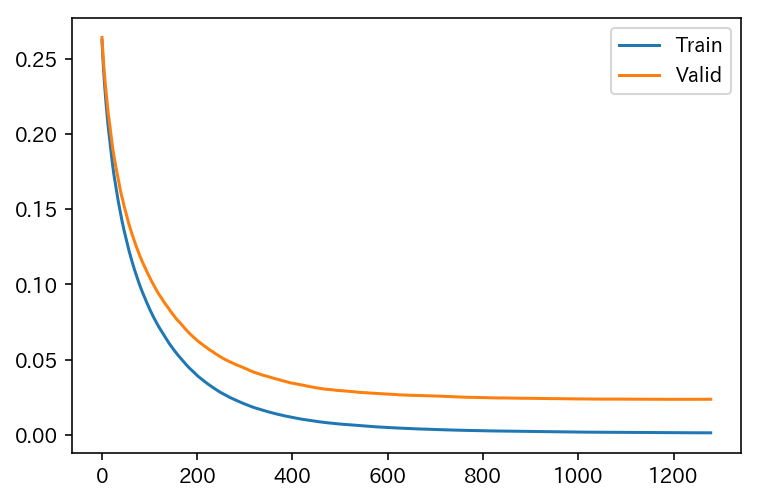

In [85]:
plt.plot(evals_result['train']['binary_logloss'], label='Train')
plt.plot(evals_result['valid']['binary_logloss'], label='Valid')
plt.legend()

### output

In [86]:
y_valid_pred_prob = model.predict(X_valid)

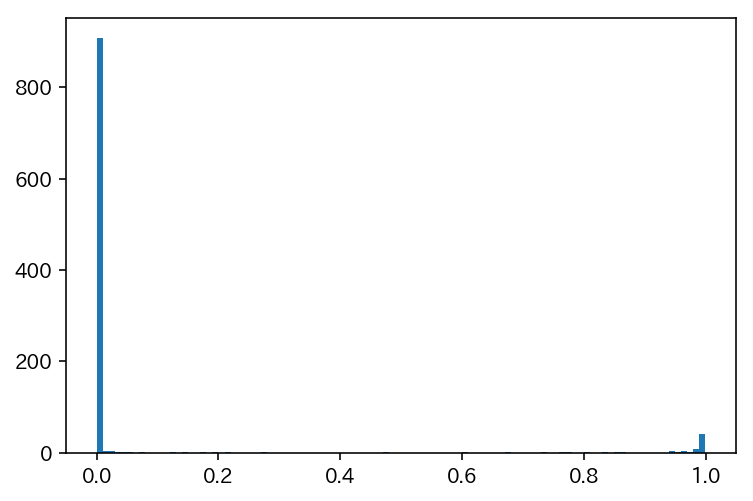

In [87]:
plt.hist(y_valid_pred_prob, bins=100)
plt.show()

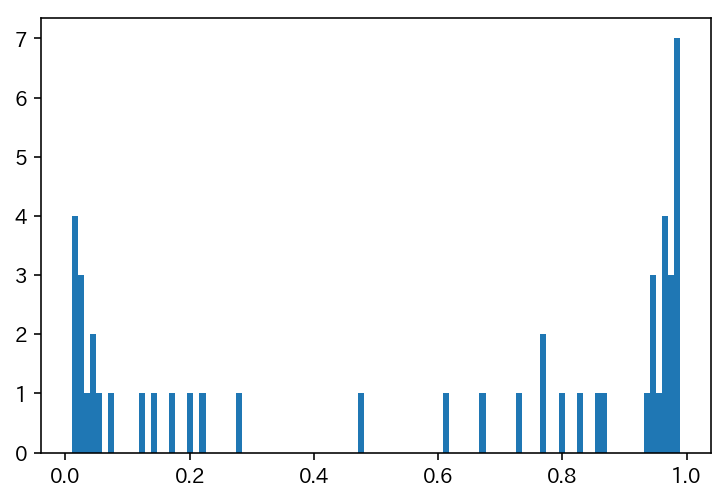

In [88]:
plt.hist(y_valid_pred_prob, bins=100, range=(0.01, 0.99))
plt.show()

In [89]:
def evaluation(y_valid_pred_prob, threshold):
    print("-"*30)
    print("threshold : " + str(threshold))
    print('acc : ' + str(accuracy_score(y_valid==0, (y_valid_pred_prob)<threshold)))
    print('recall : ' + str(recall_score(y_valid==0, (y_valid_pred_prob)<threshold)))
    print('precision : ' + str(precision_score(y_valid==0, (y_valid_pred_prob)<threshold)))
    print('f1 : ' + str(f1_score(y_valid==0, (y_valid_pred_prob)<threshold)))
    cm = confusion_matrix(y_valid==0, (y_valid_pred_prob)<threshold)
    print(cm)
    return f1_score(y_valid==0, (y_valid_pred_prob)<threshold)

In [90]:
f1_best = 0.0
threshold_best = 0.0
for threshold in range(0, 20):
    f1 = evaluation(y_valid_pred_prob, threshold/100)
    if f1 > f1_best:
        f1_best = f1
        threshold_best = threshold/100
print("\n"+"*"*30)
print("best threshold : " + str(threshold_best))
print("best f1_score : " + str(f1_best))
print("*"*30)

------------------------------
threshold : 0.0
acc : 0.07645875251509054
recall : 0.0
precision : 0.0
f1 : 0.0
[[ 76   0]
 [918   0]]
------------------------------
threshold : 0.01
acc : 0.9889336016096579
recall : 0.9880174291938998
precision : 1.0
f1 : 0.9939726027397261
[[ 76   0]
 [ 11 907]]
------------------------------
threshold : 0.02
acc : 0.9909456740442656
recall : 0.9912854030501089
precision : 0.9989023051591658
f1 : 0.9950792782941499
[[ 75   1]
 [  8 910]]
------------------------------
threshold : 0.03
acc : 0.993963782696177
recall : 0.9945533769063181
precision : 0.9989059080962801
f1 : 0.9967248908296943
[[ 75   1]
 [  5 913]]
------------------------------
threshold : 0.04
acc : 0.9929577464788732
recall : 0.9945533769063181
precision : 0.9978142076502732
f1 : 0.9961811238406982
[[ 74   2]
 [  5 913]]
------------------------------
threshold : 0.05
acc : 0.9949698189134809
recall : 0.9967320261437909
precision : 0.9978189749182116
f1 : 0.9972752043596731
[[ 74   2]

In [91]:
importance = model.feature_importance(importance_type='gain')
importance = pd.DataFrame(importance, index=col_name, columns=['importance']).sort_values('importance', ascending=False)
importance = importance.iloc[0:100, :]

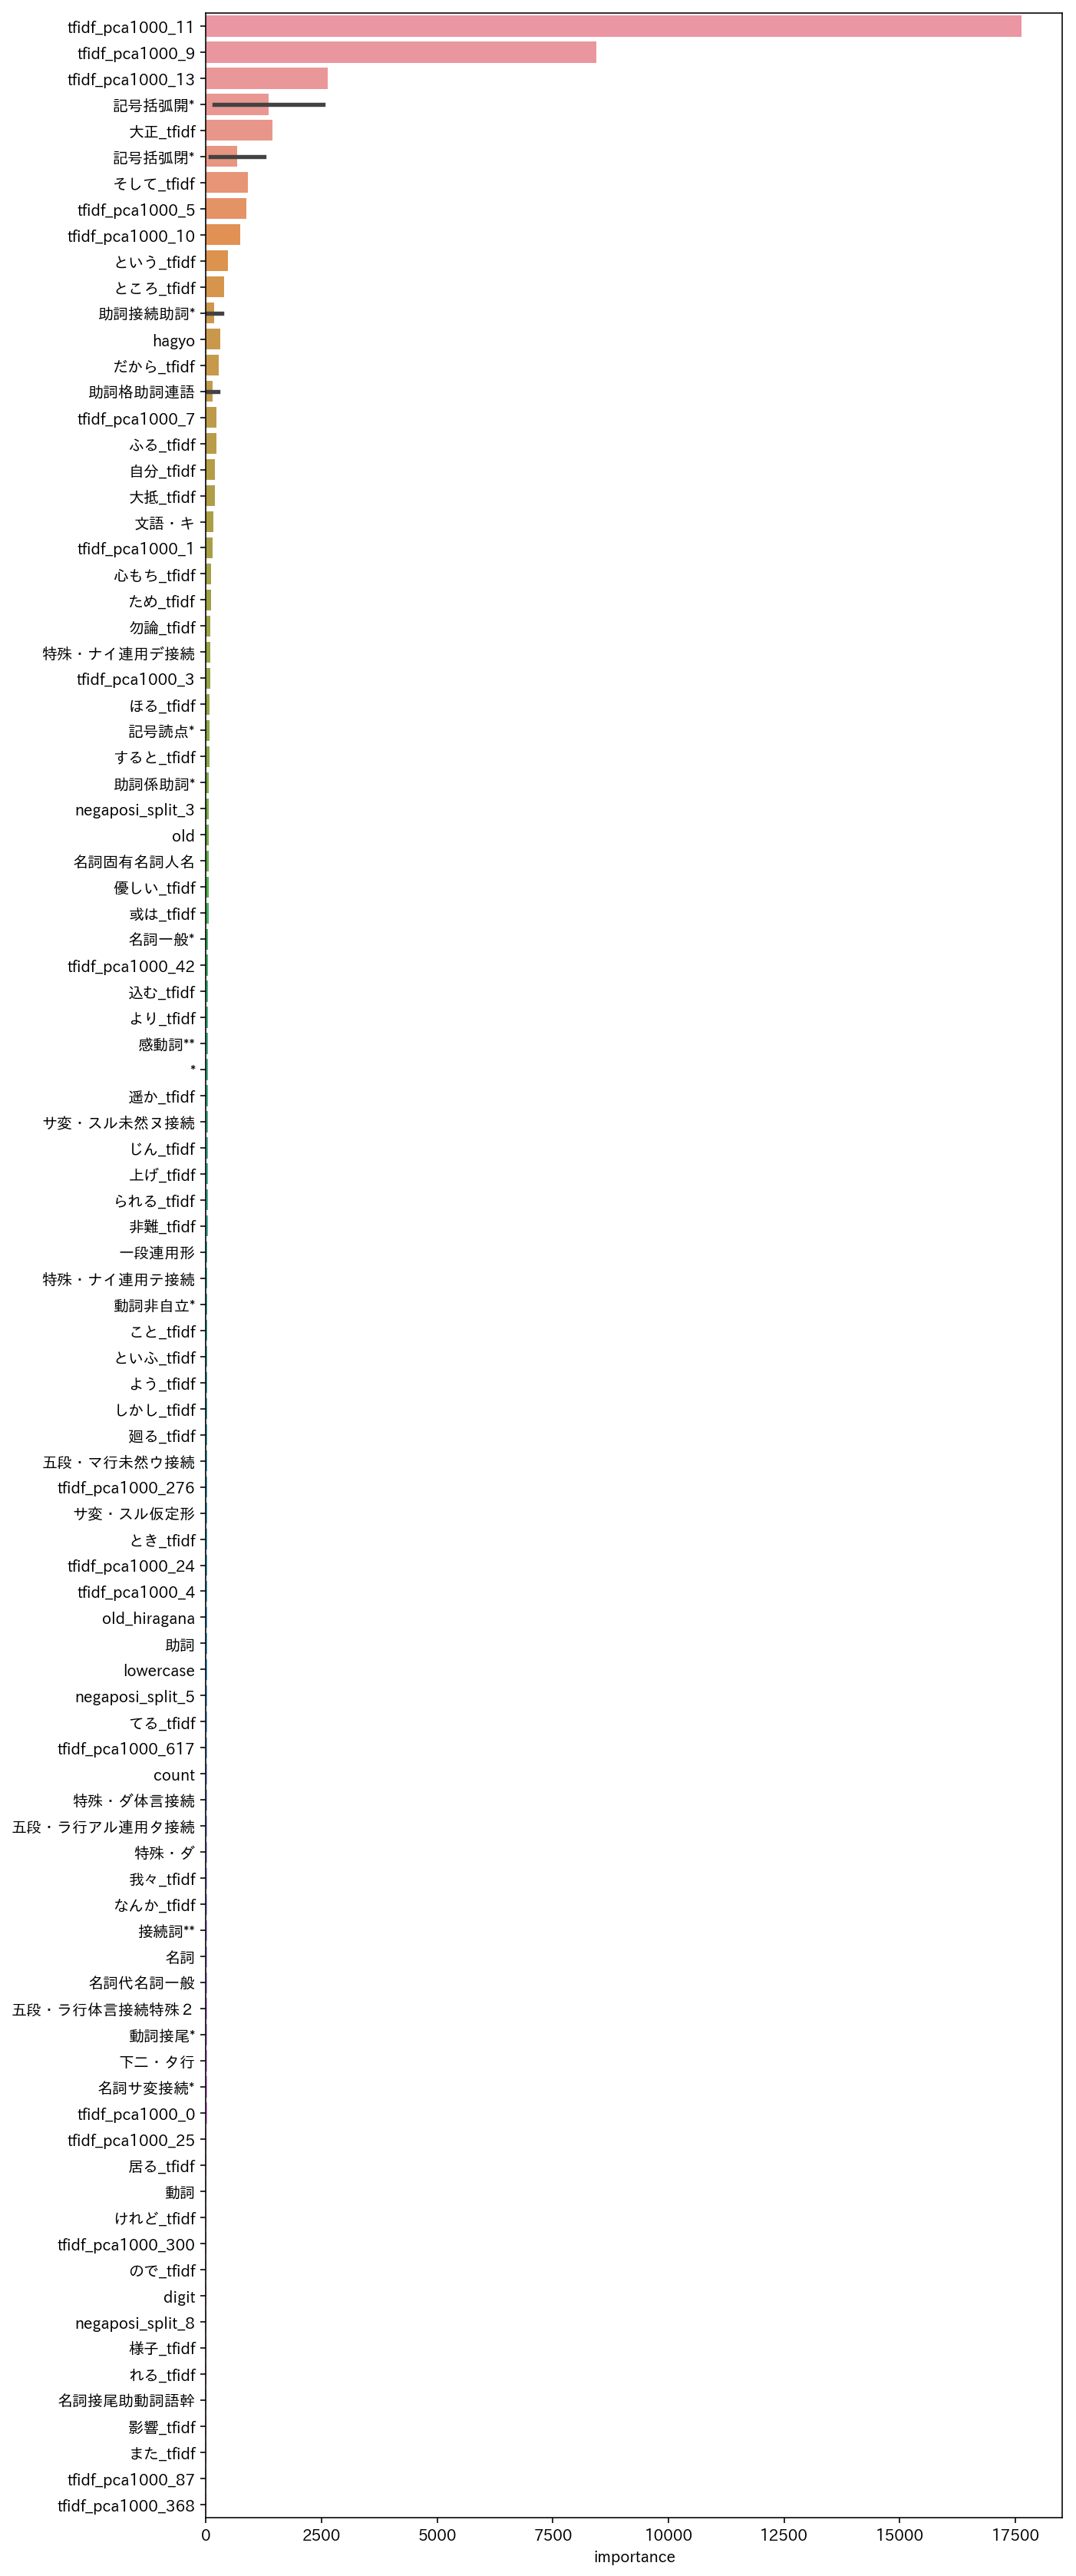

In [92]:
plt.figure(figsize=(10, 30))
sns.barplot(x = importance['importance'], y = importance.index)
plt.show()

In [93]:
importance = model.feature_importance(importance_type='split')
importance = pd.DataFrame(importance, index=col_name, columns=['importance']).sort_values('importance', ascending=False)
importance = importance.iloc[0:100, :]

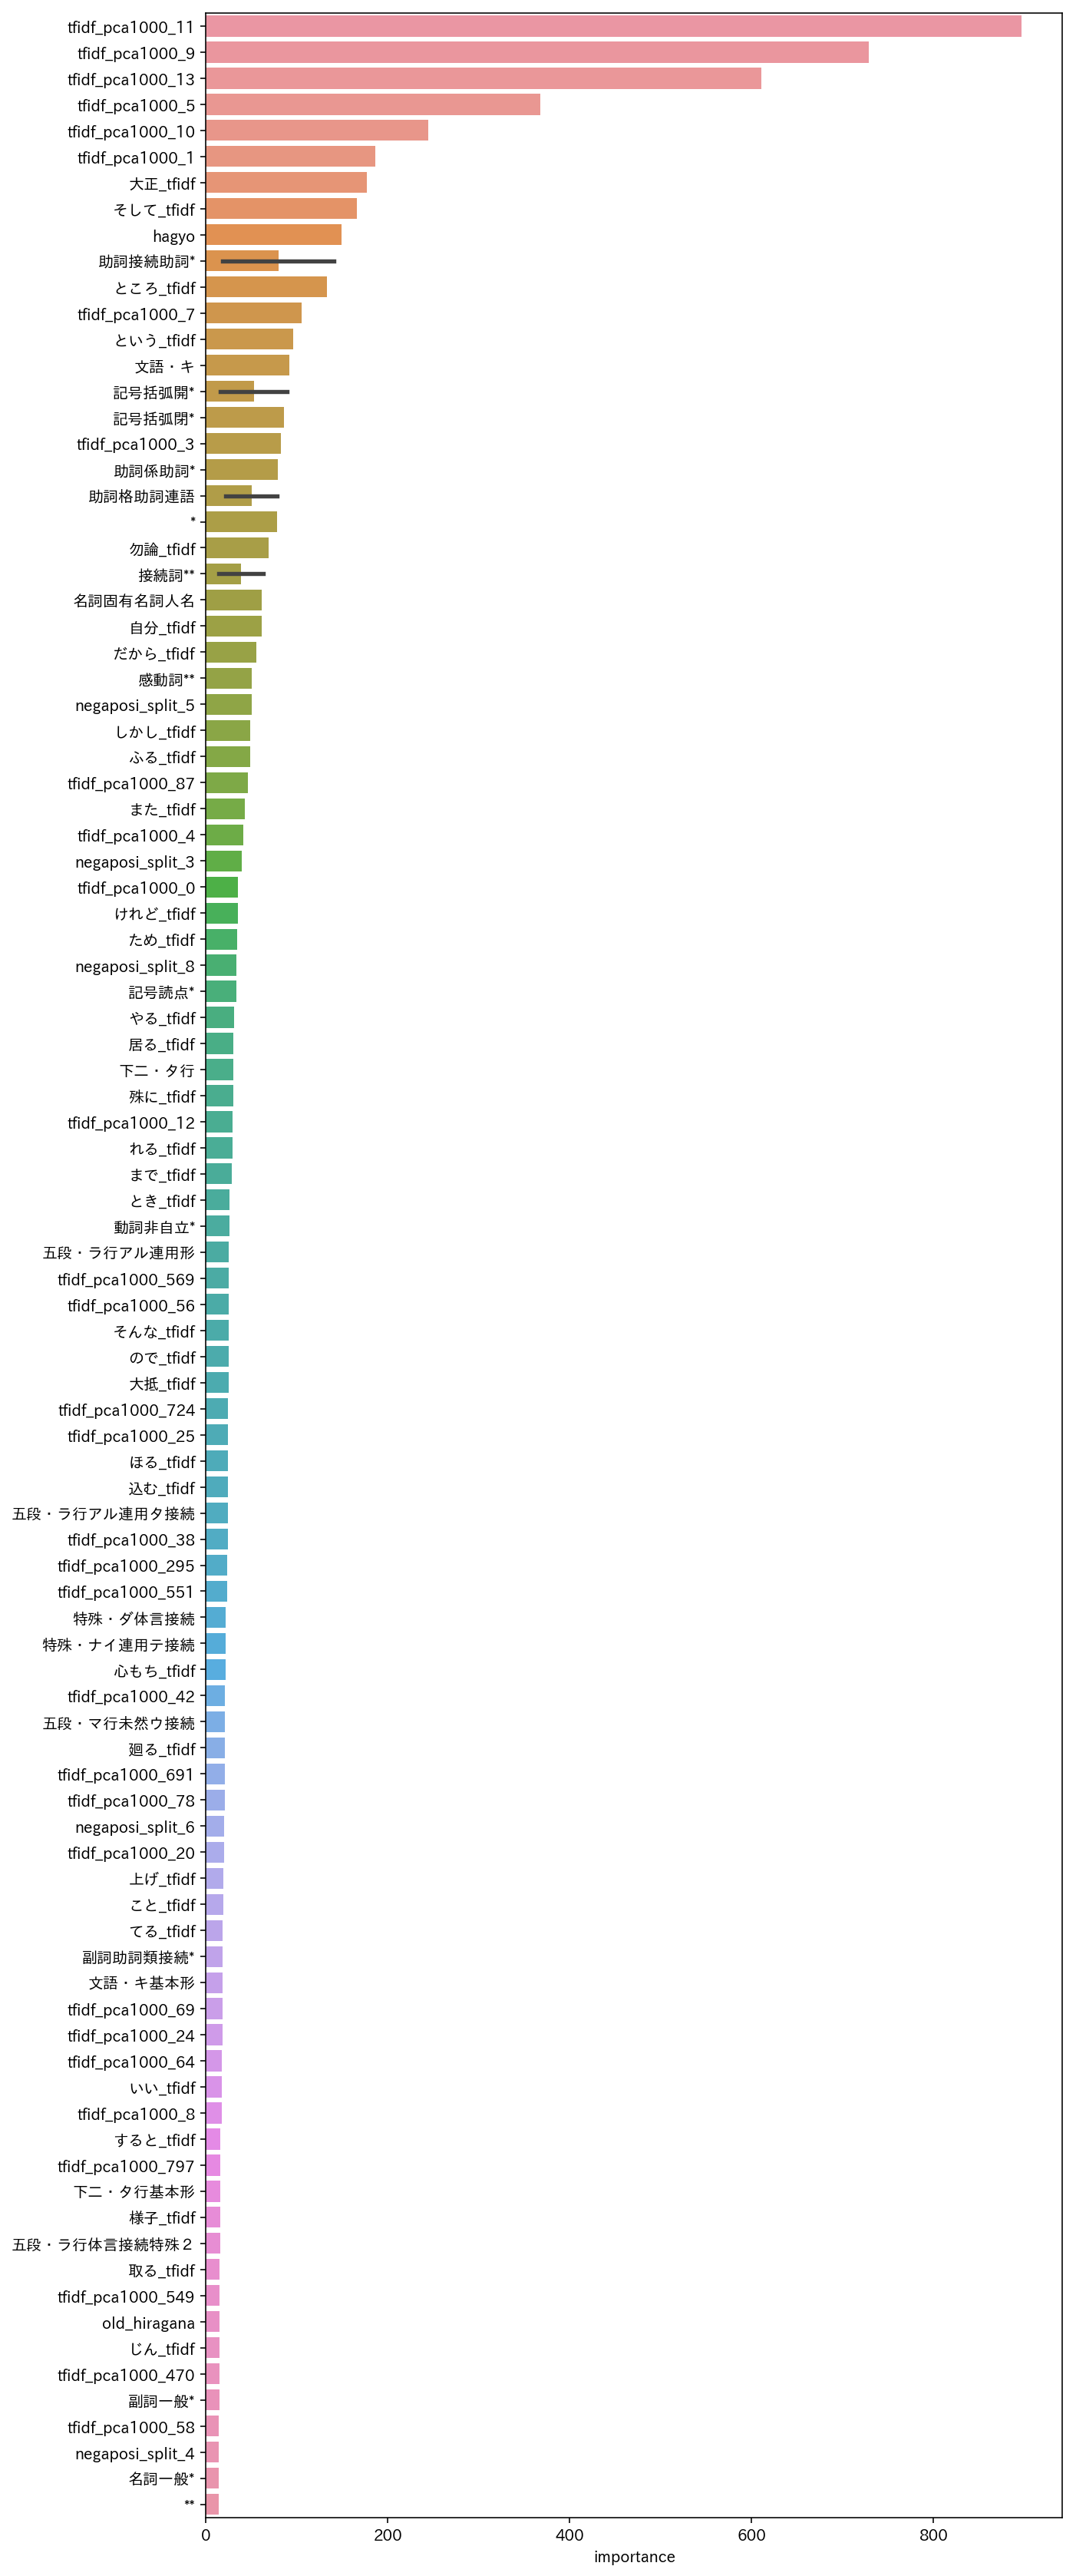

In [94]:
plt.figure(figsize=(10, 30))
sns.barplot(x = importance['importance'], y = importance.index)
plt.show()

In [95]:
y_test = model.predict(X_test)

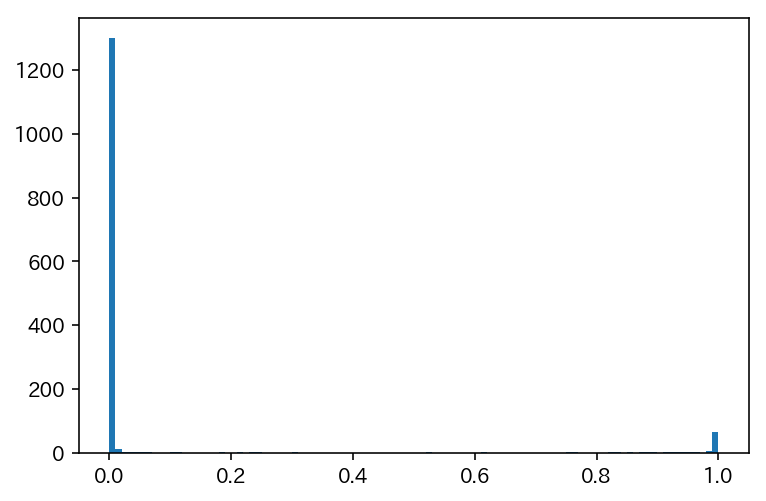

In [96]:
plt.hist(y_test, bins=100)
plt.show()

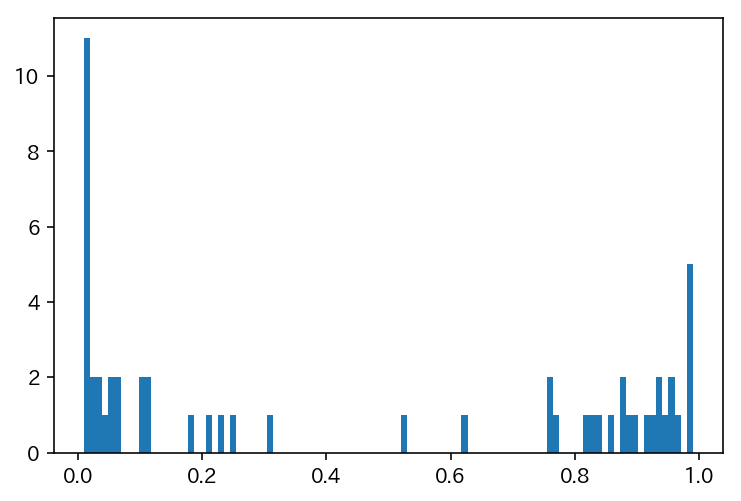

In [97]:
plt.hist(y_test, bins=100, range=(0.01, 0.99))
plt.show()

In [98]:
print("threshold_best : " + str(threshold_best))
print("akutagawa : " + str(sum((y_test > threshold_best)*1)))
print("not akutagawa : " + str(sum((y_test <= threshold_best)*1)))

threshold_best : 0.08
akutagawa : 101
not akutagawa : 1319


In [99]:
submit_sample = pd.read_csv("../input/sample_submission.csv", index_col=0)

In [100]:
train_akutagawa_rate = y_train["target"].value_counts()[0]/(y_train["target"].value_counts()[0]+y_train["target"].value_counts()[1])
test_akutagawa_rate = submit_sample["author"].value_counts()[0]/(submit_sample["author"].value_counts()[0]+submit_sample["author"].value_counts()[1])

In [101]:
submit_sample["author"] = (y_test > threshold_best)*1
# submit_sample["author"] = (y_test > (1.0 - train_akutagawa_rate))*1

train_akutagawa_rate = y_train["target"].value_counts()[0]/(y_train["target"].value_counts()[0]+y_train["target"].value_counts()[1])
test_akutagawa_rate = submit_sample["author"].value_counts()[0]/(submit_sample["author"].value_counts()[0]+submit_sample["author"].value_counts()[1])
print(train_akutagawa_rate)
print(test_akutagawa_rate)
submit_sample

0.9240724762726489
0.9288732394366197


,author
writing_id,
4,0
5,0
6,0
10,0
11,0
13,0
18,0
21,0
26,0


In [102]:
submit_sample.to_csv("../output/submission_0126_4.csv")